## Propensity Score

In [27]:
import pandas as pd
import dask.dataframe as dd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
from IPython.display import Image
#Image("/home/marlesson/Downloads/metrics_ps.png")

In [29]:
!ls ../../deep-reco-gym/output/evaluation/EvaluateTrivagoModelTestSetPredictions/results/

TrivagoLogisticModelTraining_selu____200_04a4720481_4c2b309c4e_ps_model
TrivagoLogisticModelTraining_selu____200_0534fe1b23_86ec0283d1_ps_model
TrivagoLogisticModelTraining_selu____200_0534fe1b23_acca40e6e0_ps_per_probability
TrivagoLogisticModelTraining_selu____200_0f933707b1_d46a259103_ps_model
TrivagoLogisticModelTraining_selu____200_4083caf63e_37e20fc745_ps_per_probability
TrivagoLogisticModelTraining_selu____200_9cfc524396_7fa8674381_ps_model
TrivagoLogisticModelTraining_selu____200_c5c7d72ea0_312ee91e2b_ps_model
TrivagoLogisticModelTraining_selu____200_d9e86dbbca_b7e78e7e06_ps_model
TrivagoLogisticModelTraining_selu____200_f036a0f1fa_bb9b12fc38_ps_model


In [30]:
# CRM
df_crm = dd.read_csv('../../deep-reco-gym/output/evaluation/EvaluateTrivagoModelTestSetPredictions/results/TrivagoLogisticModelTraining_selu____200_c5c7d72ea0_312ee91e2b_ps_model/df_offpolicy.csv').compute()

# BCE
df_bce = dd.read_csv('../../deep-reco-gym/output/evaluation/EvaluateTrivagoModelTestSetPredictions/results/TrivagoLogisticModelTraining_selu____200_f036a0f1fa_bb9b12fc38_ps_model/df_offpolicy.csv').compute()

df_crm['ps_i'] = df_crm.apply(lambda row: int(row['item_idx'] == row['item_idx_action']), axis=1)
df_bce['ps_i'] = df_bce.apply(lambda row: int(row['item_idx'] == row['item_idx_action']), axis=1)

df = df_bce
df.head()


,timestamp,timestamp_diff,step,user_idx,session_idx,city_idx,sum_action_item_before,action_type_item_idx,action_type_idx,list_action_type_idx,...,vocab_size,window_hist_size,item_idx_action,relevance_list,prob_actions,rewards,action_rhat_rewards,item_idx_rhat_rewards,ps_eval,ps_i
0,1541461727,1541461708,2.0,3674,3219,0,0.0,809,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 2]",...,120,10,603,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,0.043061,0.016492,1,0
1,1541461727,1541461708,2.0,3674,3219,0,0.0,809,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 2]",...,120,10,603,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",1.0,0.412815,0.150671,1,0
2,1541461727,1541461708,2.0,3674,3219,0,0.0,809,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 2]",...,120,10,603,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,0.327208,0.120953,1,0
3,1541461727,1541461708,2.0,3674,3219,0,0.0,809,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 2]",...,120,10,603,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,0.253131,0.213226,1,0
4,1541461727,1541461708,2.0,3674,3219,0,0.0,809,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 2]",...,120,10,603,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,0.191347,0.191347,1,1


## IPS

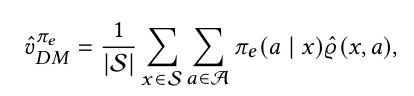

In [31]:
from IPython.display import Image
Image("/home/marlesson/Downloads/Captura de tela de 2020-05-26 10-36-26.png")


In [32]:
df_hit_crm = df_crm[(df_crm.ps_i == 1) & (df_crm.rewards == 1)]
df_hit_crm.shape

(757, 127)

In [33]:
df_hit_bce = df_bce[(df_bce.ps_i == 1) & (df_bce.rewards == 1)]
df_hit_bce.shape

(790, 127)

In [34]:
df_hit_bce.head()

,timestamp,timestamp_diff,step,user_idx,session_idx,city_idx,sum_action_item_before,action_type_item_idx,action_type_idx,list_action_type_idx,...,vocab_size,window_hist_size,item_idx_action,relevance_list,prob_actions,rewards,action_rhat_rewards,item_idx_rhat_rewards,ps_eval,ps_i
81,1541461759,29287773125,20.0,1373,1572,0,19.0,221,2,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5]",...,120,10,221,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,0.997568,0.997568,1,1
97,1541461770,163394825917,107.0,1914,3635,0,16.0,616,2,"[5, 5, 5, 5, 5, 10, 5, 5, 5, 5]",...,120,10,616,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,0.156350,0.156350,1,1
126,1541461808,1541461706,2.0,2534,2831,0,1.0,986,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 2]",...,120,10,986,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,0.857709,0.857709,1,1
251,1541461941,151063238025,99.0,1639,3377,0,11.0,1056,2,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5]",...,120,10,1056,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,0.992152,0.992152,1,1
291,1541462106,164936287687,108.0,1914,3635,0,17.0,616,2,"[5, 5, 5, 5, 10, 5, 5, 5, 5, 2]",...,120,10,616,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,0.283679,0.283679,1,1


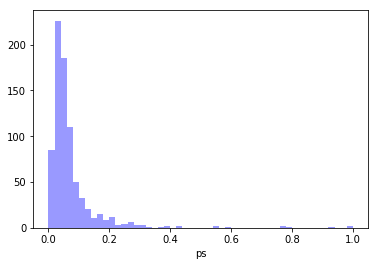

In [35]:
d1 = df_hit_bce['ps']
sns.distplot(d1, kde=False, color="b")

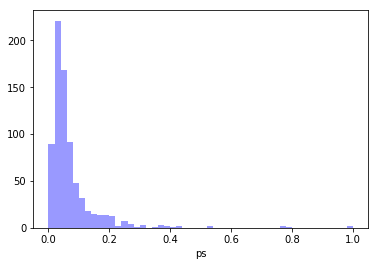

In [36]:
d2 = df_hit_crm['ps']
sns.distplot(d2, kde=False, color="b")

In [37]:
print("BCE:", len(d1), np.mean(d1))
print("CRM:", len(d2), np.mean(d2))

BCE: 790 0.07420957237209452
CRM: 757 0.0743398402547347


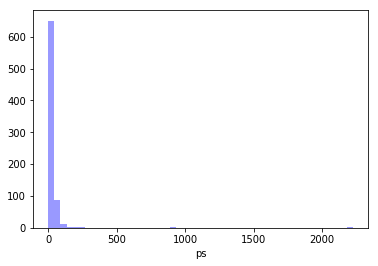

In [38]:
d2 = df_hit_crm['ps']
sns.distplot(1/d2, kde=False, color="b")

In [203]:

# def fill_ps_per_logistic_regression_of_pos_item_idx_and_item_ps(self, df: pd.DataFrame, pool: Pool):
#     all_df = self._get_all_df()
#     ground_truth_df = self._get_ground_truth(all_df)
#     item_column = self.model_training.project_config.item_column.name

#     ps_per_pos_item_idx = self._create_dict_of_ps_per_pos_item_idx(ground_truth_df)
#     ps_per_item = self._create_dict_of_ps_per_item(ground_truth_df)

#     train_df = pd.DataFrame(data={
#         "ps_per_pos_item_idx": all_df["pos_item_idx"].apply(lambda pos_item_idx:
#                                                         ps_per_pos_item_idx.get(pos_item_idx, 0.0)),
#         "ps_per_item": all_df[item_column].apply(lambda item_idx: ps_per_item.get(item_idx, 0.0))
#     })

#     train_y = all_df[self.model_training.project_config.output_column.name].values
#     model = LogisticRegression(class_weight="balanced")
#     model.fit(train_df.values, train_y)

#     test_df = pd.DataFrame(data={
#         "ps_per_pos_item_idx": df["pos_item_idx"].apply(lambda pos_item_idx:
#                                                         ps_per_pos_item_idx.get(pos_item_idx, 0.0)),
#         "ps_per_item": df[item_column].apply(lambda item_idx: ps_per_item.get(item_idx, 0.0))
#     })

#     df[self.model_training.project_config.propensity_score_column_name] = model.predict_proba(test_df.values)[:, 1]


In [204]:
# df_ps_per_item_in_first_pos = dd.read_csv('../../deep-reco-gym/output/evaluation/EvaluateTrivagoTestSetPredictions/results/TrivagoLogisticModelInteraction_selu____softmax_explorer_acf090f664_efe57863b1_ps_per_item_in_first_pos/df_offpolicy.csv')
# df_ps_per_item              = dd.read_csv('../../deep-reco-gym/output/evaluation/EvaluateTrivagoTestSetPredictions/results/TrivagoLogisticModelInteraction_selu____softmax_explorer_acf090f664_6e22910cf3_ps_per_item/df_offpolicy.csv')
# df_ps_per_item_given_pos    = dd.read_csv('../../deep-reco-gym/output/evaluation/EvaluateTrivagoTestSetPredictions/results/TrivagoLogisticModelInteraction_selu____softmax_explorer_acf090f664_0ff164d6b3_ps_per_item_given_pos//df_offpolicy.csv')
# #df_ps_per_logistic_regression_of_pos_item_idx_and_item_ps   = dd.read_csv('../../deep-reco-gym/output/evaluation/EvaluateTrivagoTestSetPredictions/results/TrivagoLogisticModelInteraction_selu____softmax_explorer_acf090f664_31dfd08969_ps_per_logistic_regression_of_pos_item_idx_and_item_ps//df_offpolicy.csv')
# df_ps_per_pos_item_idx      = dd.read_csv('../../deep-reco-gym/output/evaluation/EvaluateTrivagoTestSetPredictions/results/TrivagoLogisticModelInteraction_selu____softmax_explorer_acf090f664_0bfe1ad92d_ps_per_pos_item_idx/df_offpolicy.csv')
# df_ps_per_logistic_regression_of_pos_item_idx_and_item   = dd.read_csv('../../deep-reco-gym/output/evaluation/EvaluateTrivagoTestSetPredictions/results/TrivagoLogisticModelInteraction_selu____softmax_explorer_acf090f664_88bdf87acd_ps_per_logistic_regression_of_pos_item_idx_and_item//df_offpolicy.csv')


# df_ps_per_item_in_first_pos.head()

In [205]:
# metrics = {
#     "df_ps_per_item_in_first_pos": df_ps_per_item_in_first_pos,
#     "df_ps_per_item": df_ps_per_item,
#     "df_ps_per_item_given_pos": df_ps_per_item_given_pos,
#     "df_ps_per_logistic_regression_of_pos_item_idx_and_item_ps": df_ps_per_logistic_regression_of_pos_item_idx_and_item_ps,
#     "df_ps_per_pos_item_idx": df_ps_per_pos_item_idx,
#     "df_ps_per_logistic_regression_of_pos_item_idx_and_item":df_ps_per_logistic_regression_of_pos_item_idx_and_item
# }

In [206]:
# results = {}
# for n, df in metrics.items():
#     m = df['ps'].mean().compute()
#     results[n] = m


In [207]:
# d = df['ps'].compute()
# sns.distplot(d, kde=False, color="b")

In [208]:
# d = df['ps_eval'].compute()
# sns.distplot(d, kde=False, color="b")

In [209]:
#df['clicked'].compute().mean()

In [210]:
_df = df[['item_idx', 'item_idx_action', 'item_idx_rhat_rewards', 'action_rhat_rewards', 
          'rewards', 'ps', 'ps_eval']].compute()
_df['I'] = _df.apply(lambda row: int(row['item_idx'] == row['item_idx_action']), axis=1)
_df

AttributeError: 'DataFrame' object has no attribute 'compute'

In [ ]:
_df.shape

In [ ]:
_df['rewards'].mean()

# DirectEstimator

In [ ]:
from IPython.display import Image
#Image("/home/marlesson/Downloads/Captura de tela de 2020-05-26 10-36-26.png")


In [ ]:
_df[['item_idx', 'item_idx_action', 'rewards']].head()

In [ ]:
d1 = _df['item_idx_rhat_rewards']#.compute()
sns.distplot(d1, kde=False, color="b")

In [ ]:
np.mean(d1), np.mean(_df['rewards'])

In [ ]:
d2 = _df['action_rhat_rewards']#.compute()
sns.distplot(d2, kde=False, color="b")

In [ ]:
np.mean(d1), np.mean(d2)

In [211]:
np.mean(d1), np.mean(d2)

(0.030995784655686736, 0.3020443525904013)

In [212]:
#d = _df[_df['rewards'] == 1.0]['item_idx_rhat_rewards']#.compute()
#sns.distplot(d, kde=False, color="b")

In [213]:
#d = _df[_df['rewards'] == 1.0]['action_rhat_rewards']#.compute()
#sns.distplot(d, kde=False, color="b")

In [214]:
np.mean(_df['item_idx_rhat_rewards']), np.mean(_df['action_rhat_rewards'])

(0.030995784655686736, 0.3020443525904013)

In [215]:
len(np.unique(_df['item_idx'])), len(np.unique(_df['item_idx_action']))

(1387, 366)

# IPS

In [216]:
from IPython.display import Image
#Image("/home/marlesson/Downloads/Captura de tela de 2020-05-26 10-36-10.png")

In [217]:
import sys, os
import numpy as np
import pandas as pd
import scipy

sys.path.insert(0, "/home/marlesson/deep-reco-gym/")
from recommendation.offpolicy_metrics import eval_IPS, eval_CIPS, eval_SNIPS, eval_doubly_robust

_df.head()

,item_idx,item_idx_action,item_idx_rhat_rewards,action_rhat_rewards,rewards,ps,ps_eval,I
0,238,799,0.015205,0.045149,0.0,0.061792,1,0
1,809,799,0.092327,0.135926,1.0,0.050305,1,0
2,104,799,0.057844,0.121191,0.0,0.100533,1,0
3,799,799,0.106438,0.106438,0.0,0.038490,1,1
4,603,799,0.078554,0.093172,0.0,0.037547,1,0


In [218]:
def _offpolicy_eval(df: pd.DataFrame):
    # Filter df used in offpolicy evaluation
    ps_column             = 'ps'
    e                     = 0.001
    df_offpolicy          = df[df[ps_column] > e]

    rewards               = df_offpolicy["rewards"].values
    ps_eval               = df_offpolicy["ps_eval"].values
    ps                    = df_offpolicy[ps_column].values
    action_rhat_rewards   = df_offpolicy["action_rhat_rewards"].values
    item_idx_rhat_rewards = df_offpolicy["item_idx_rhat_rewards"].values
    ps_i = df_offpolicy["I"].values
    
    return action_rhat_rewards, item_idx_rhat_rewards, rewards, ps_eval, ps, ps_i

def _calc_sample_weigths(rewards, t_props, l_props):
  # l_props: Coleta
  # t_props: Avaliação
  #
  # Compute the sample weights - propensity ratios
  p_ratio = t_props / l_props

  # Effective sample size for E_t estimate (from A. Owen)
  n_e = len(rewards) * (np.mean(p_ratio) ** 2) / (p_ratio ** 2).mean()

  # Critical value from t-distribution as we have unknown variance
  alpha = .00125
  cv = scipy.stats.t.ppf(1 - alpha, df=int(n_e) - 1)

  return p_ratio, n_e, cv


def eval_CIPS(rewards, t_props, l_props, cap=15):
  # Calculate Sample Weigths
  p_ratio, n_e, cv =  _calc_sample_weigths(rewards, t_props, l_props)


  ############## 
  # CAPPED IPS #
  ##############
  # Cap ratios
  p_ratio_capped = np.clip(p_ratio, a_min=None, a_max=cap)

  # Expected reward for pi_t
  E_t_capped = np.mean(rewards * p_ratio_capped)

  # Variance of the estimate
  var_capped = ((rewards * p_ratio_capped - E_t_capped) ** 2).mean()
  stddev_capped = np.sqrt(var_capped)

  # C.I. assuming unknown variance - use t-distribution and effective sample size
  c = cv * stddev_capped / np.sqrt(int(n_e))

  min_bound_capped = E_t_capped - c
  max_bound_capped = E_t_capped + c

  result = (E_t_capped, c) # 0.025, 0.500, 0.975

  return result

In [219]:
_df.head()

,item_idx,item_idx_action,item_idx_rhat_rewards,action_rhat_rewards,rewards,ps,ps_eval,I
0,238,799,0.015205,0.045149,0.0,0.061792,1,0
1,809,799,0.092327,0.135926,1.0,0.050305,1,0
2,104,799,0.057844,0.121191,0.0,0.100533,1,0
3,799,799,0.106438,0.106438,0.0,0.038490,1,1
4,603,799,0.078554,0.093172,0.0,0.037547,1,0


In [220]:
#_df[(_df['item_idx'] == _df['item_idx_action'])]

In [256]:
action_rhat_rewards, item_idx_rhat_rewards, \
    rewards, ps_eval, ps, ps_i = _offpolicy_eval(_df)

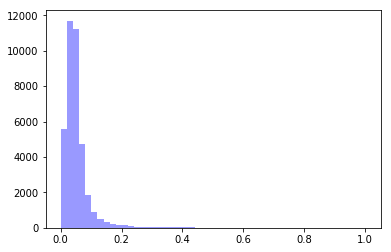

In [257]:
sns.distplot(ps, kde=False, color="b")

In [258]:
np.mean(ps)

0.05479851387500983

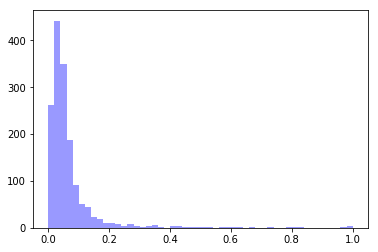

In [223]:
action_rhat_rewards, item_idx_rhat_rewards, \
    rewards, ps_eval, ps, ps_i = _offpolicy_eval(_df[_df['rewards'] == 1])
sns.distplot(ps, kde=False, color="b")

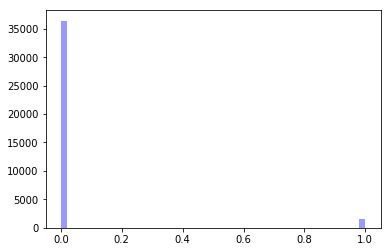

In [224]:
action_rhat_rewards, item_idx_rhat_rewards, \
    rewards, ps_eval, ps, ps_i = _offpolicy_eval(_df)
sns.distplot(ps_i, kde=False, color="b")

In [225]:
np.mean(ps_eval)

1.0057929799615557

In [226]:
action_rhat_rewards, item_idx_rhat_rewards, \
    rewards, ps_eval, ps, ps_i = _offpolicy_eval(_df)

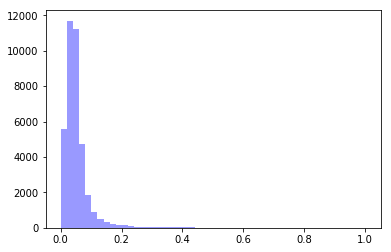

In [227]:
sns.distplot(ps, kde=False, color="b")

In [228]:
np.mean(ps)

0.05479851387500983

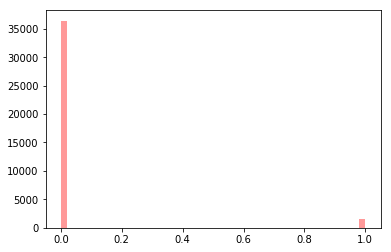

In [229]:
sns.distplot(ps_i, kde=False, color="r")

In [230]:
np.mean(ps_i)

0.04113015772704532

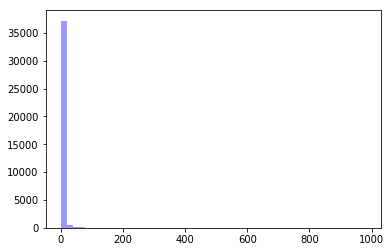

In [231]:
sw      = ps_i/ps
#sw, _, _ = _calc_sample_weigths(rewards,ps_eval, ps)
sns.distplot(sw, kde=False, color="b")

In [232]:
# p_ratio = sw*rewards
# #p_ratio = np.clip(p_ratio, a_min=None, a_max=1)

# sns.distplot(p_ratio, kde=False, color="r")

0.26349773199158655


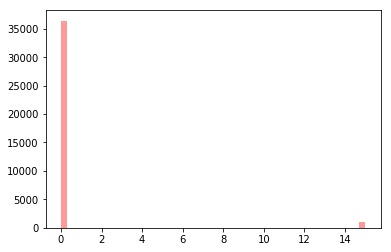

In [233]:
#p_ratio = sw*rewards
p_ratio = np.clip(sw, a_min=None, a_max=15)
print(np.mean(p_ratio * rewards))
sns.distplot(p_ratio, kde=False, color="r")

In [234]:
eval_IPS(rewards, ps_i, ps)

(0.6790156096358897, 1.7640535114364186)

In [235]:
v = []
for i in range(1000):
   ips, _ =eval_CIPS(rewards, ps_i, ps, cap=i+1)
   v.append(ips)

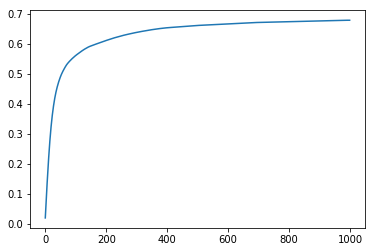

In [236]:
plt.plot(v)

#eval_IPS(rewards, ps_i, ps)

In [172]:
eval_IPS(rewards, ps_eval, ps)

(1.5836157417550232, 0.5098816568526752)

In [173]:
eval_IPS(rewards, ps_i, ps)

(0.6790156096358897, 1.7640535114364186)

In [82]:
eval_CIPS(rewards, ps_i, ps, cap=1)

(0.0, 0.0)

# DR

In [237]:
from IPython.display import Image
#Image("/home/marlesson/Downloads/Captura de tela de 2020-05-26 10-36-18.png")

In [238]:
def eval_doubly_robust(action_rhat_rewards, item_idx_rhat_rewards, rewards, 
                       t_props, l_props, cap=None):
  # t_props: Avaliação
  # l_props: Coleta

  # Calculate Sample Weigths
  p_ratio, n_e, cv =  _calc_sample_weigths(rewards, t_props, l_props)


  # Cap ratios
  if cap is not None:
    p_ratio = np.clip(p_ratio, a_min=None, a_max=cap)

  #################
  # Roubly Robust #
  #################
  dr = (p_ratio*(rewards - item_idx_rhat_rewards)) + action_rhat_rewards
  x1 = (rewards - item_idx_rhat_rewards)
  x2 = action_rhat_rewards
  #dr = (p_ratio*(rewards - item_idx_rhat_rewards)) + action_rhat_rewards

  confidence=0.95
  n = len(dr)
  m, se = np.mean(dr), scipy.stats.sem(dr)
  h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

  return dr, m, h, x1, x2

In [239]:
# sns.distplot(action_rhat_rewards, kde=False, color="b")
# sns.distplot(item_idx_rhat_rewards, kde=False, color="r")

In [242]:
# CRM
action_rhat_rewards, item_idx_rhat_rewards, \
    rewards, ps_eval, ps, ps_i = _offpolicy_eval(ps_model1)

crm_val = []
for i in range(1000):
    dr_r, dr, c, x1, x2 = eval_doubly_robust(action_rhat_rewards, item_idx_rhat_rewards, rewards, ps_i, ps, cap=i)
    dr
    crm_val.append(dr)
    


In [243]:
# BCE
action_rhat_rewards, item_idx_rhat_rewards, \
    rewards, ps_eval, ps, ps_i = _offpolicy_eval(ps_model2)

bce_val = []
for i in range(1000):
    dr_r, dr, c, x1, x2 = eval_doubly_robust(action_rhat_rewards, item_idx_rhat_rewards, rewards, ps_i, ps, cap=i)
    dr
    bce_val.append(dr)


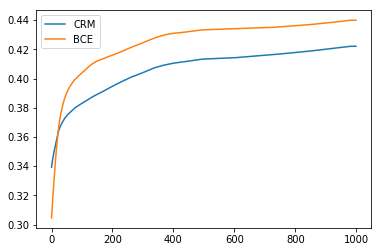

In [248]:
plt_crm = plt.plot(crm_val, label='CRM')
plt_bce = plt.plot(bce_val, label='BCE')
plt.legend()

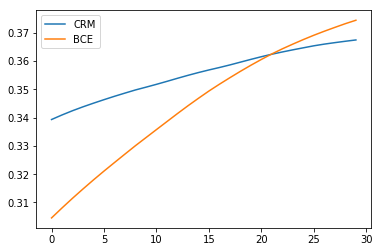

In [251]:
plt_crm = plt.plot(crm_val[:30], label='CRM')
plt_bce = plt.plot(bce_val[:30], label='BCE')
plt.legend()

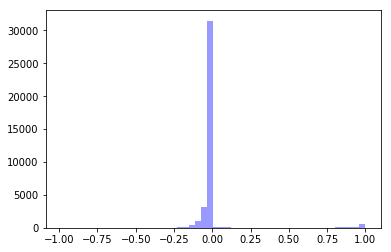

In [177]:
sns.distplot(x1, kde=False, color="b")

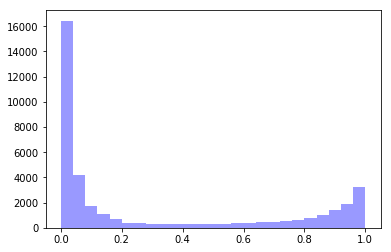

In [178]:
sns.distplot(x2, kde=False, color="b")

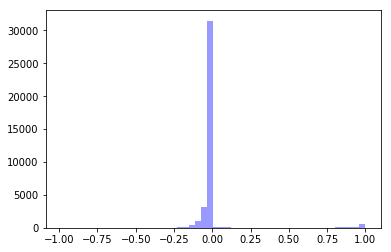

In [179]:
sns.distplot(x1, kde=False, color="b")

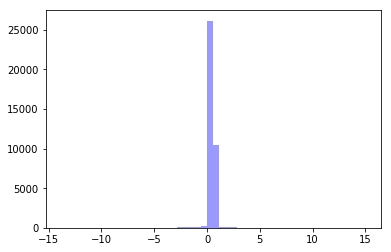

In [180]:
sns.distplot(dr_r, kde=False, color="b")

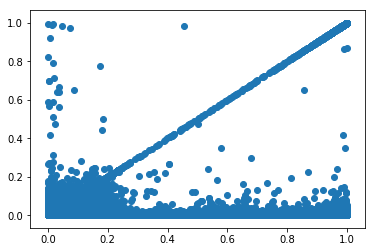

In [181]:
plt.scatter(action_rhat_rewards, item_idx_rhat_rewards)

In [182]:
np.mean(dr_r), dr, c

(0.34936907150936214, 0.34936907150936214, 0.01051716921791203)